<a href="https://colab.research.google.com/github/jiashenyue/ca-wui-pop-increase/blob/main/project_proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proposal for Project 2**
- **Coding Dojo**
- **Shenyue Jia** | [jiashenyue.info](https://jiashenyue.info/)

## **Option 1: Investigating the population increase inside California's Wildland-Urban Interface (WUI) from 2010 to 2019**

###**Overview**

During the past decade, an increasing number of population is now living inside Wildland-Urban Interface (WUI), a high-risk zone of wildfire. Such trend is the most prominent in California amid the housing crisis caused by a significant increase of population and a shrinking availability of homes. As a result, real estate companies started to develop in suburbs closer to the wild that historically possesse a population density, which is referred to as Wildland-Urban Interface (WUI).

The sprawling into the wild caused by such trend now puts more people at a greater exposure of high wildfire risk. Under a projected increase of wildfire occurrence caused by climate change, these people will eventually face even greater wildfire risk than present. A recent New York Times story visualized the sprawling into the WUI.

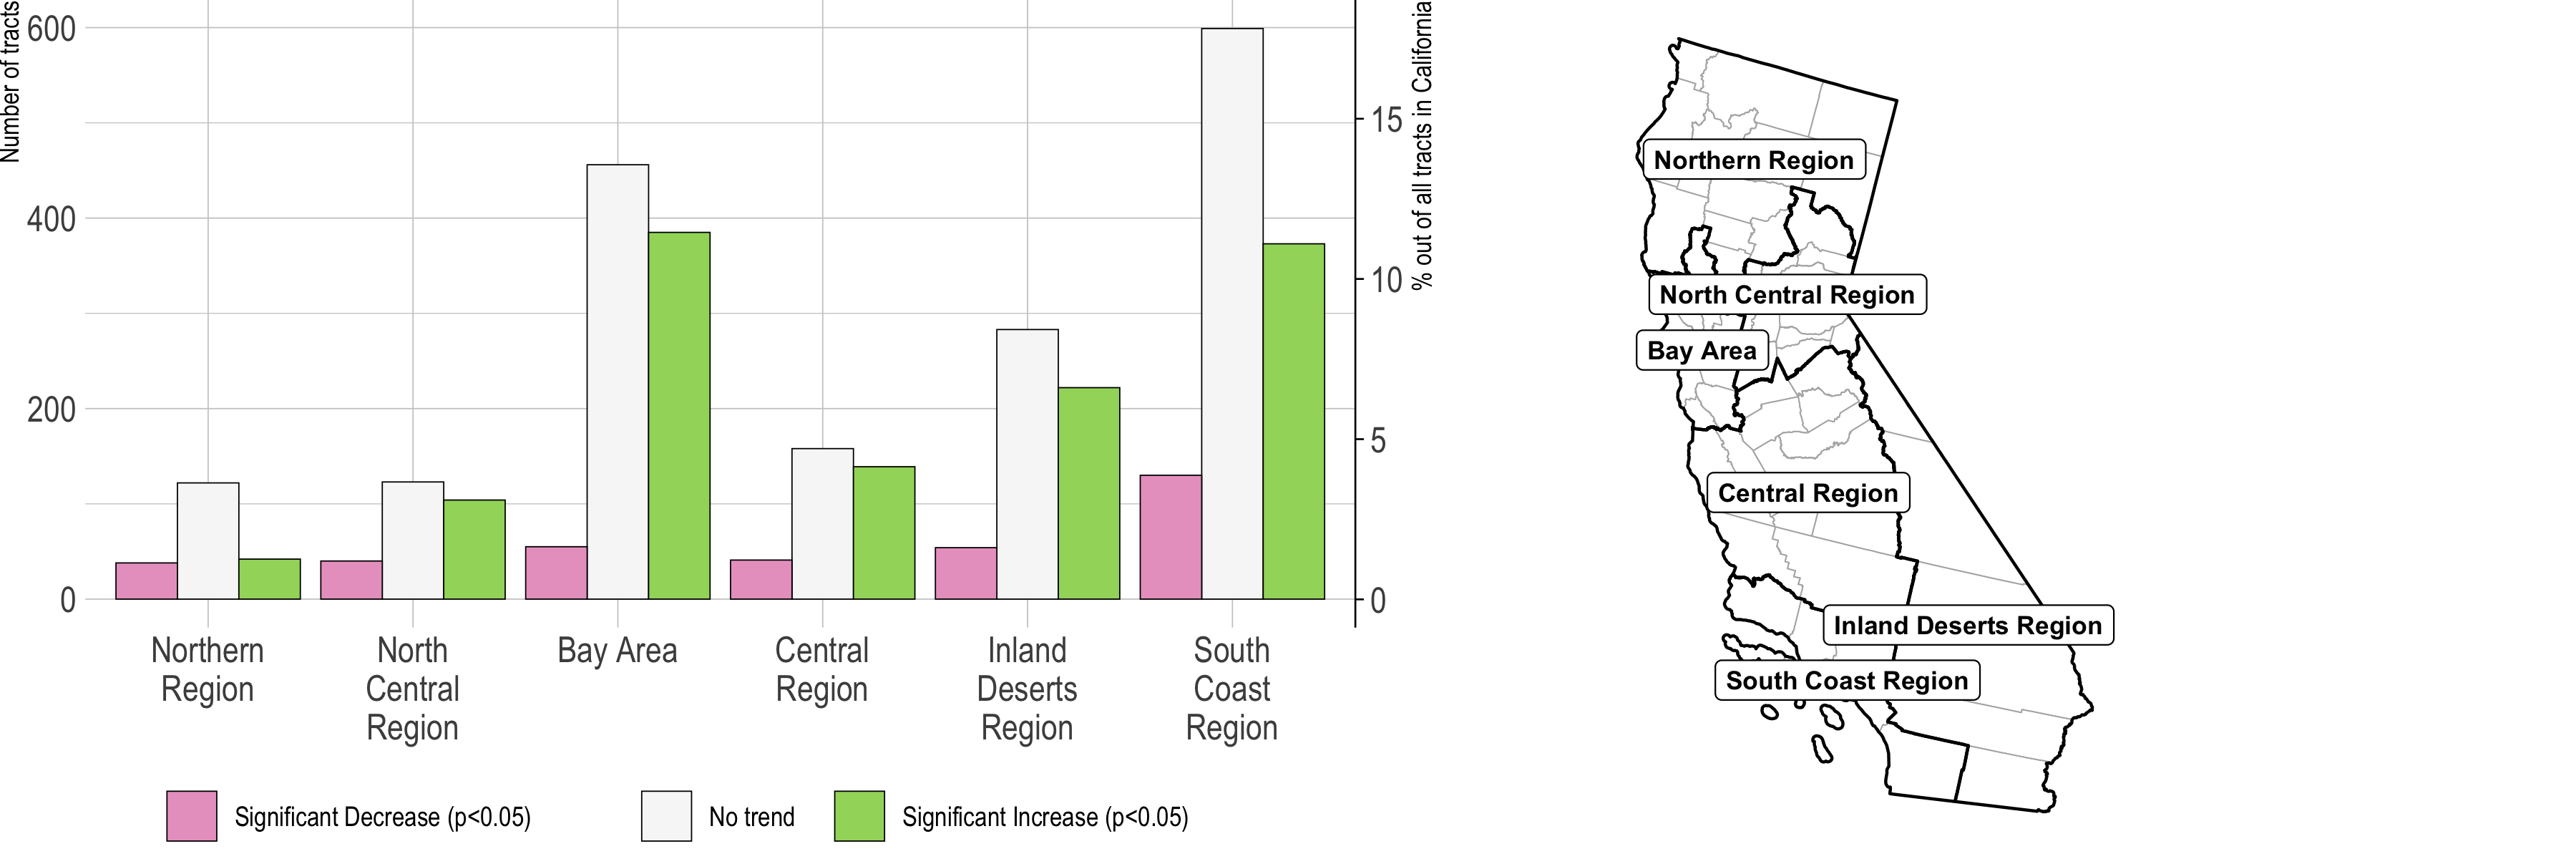


Credit: [Viner et al., (2022) at IAWF Fire & Climate Conference](https://digitalcommons.chapman.edu/scs_articles/791/)

We will perform a retrospective analysis to investigate what are the drivers of the population increase inside California's WUI during the past decade. This is NOT a time series related problem as the degree of population change has been already computed and will be used as the target variable.

### **Source of Data**
- **Target variable**
  - The magnitude of population increase at the **census tract** level for California from 2010 to 2019.
  - Magnitude here is defined as the degree of increase computed using the yearly population estimates from [American Community Survey (ACS)](https://www.census.gov/programs-surveys/acs) by the U.S. Census Bureau.
  - **Note:** there is no need to apply time-series analysis as the **degree of increase** has already been prepared by authors from [this study](https://digitalcommons.chapman.edu/scs_articles/791/).
- **Features**
  - **Esri House Affordability Index at the census tract level**
    - Housing Affordability Index (HAI) measures the financial ability of a typical household to purchase an existing home in an area based on 
      - Share of Income to Mortgage
      - Median Household Income
      - Median House Price
    - **HAI = 100**: this area that on average has sufficient household income to qualify for a loan on a home valued at the median home price. 
    - **HAI > 100**: homes in this area are easily afforded by the average area resident. 
    - **HAI < 100**: homes are less affordable.
    - This metric is developed and computed at a various spatial levels, including the census tract level by [Esri](https://www.arcgis.com/home/item.html?id=a1263c2dcdf2464bbb7906821038eb2f)
  - **Household Income at the census tract level**
    - Maximum
    - Median
    - Minimum
  - **Rent-Own Ratio at the census tract level**
    - This metric is derived using the latest ACS data, which contains a lot of demographic metrics, including **% of people renting** and **% of people owning**
  - **Wildfire Hazard Potential**
    - This metric is derived as an image service by [U.S. Forest Service Fire Lab](https://www.firelab.org/project/wildfire-hazard-potential)
    - Authors of [this work](https://digitalcommons.chapman.edu/scs_articles/791/) have already preprocessed this dataset to obtain a census tract level data for analysis
  - **Wildfire Risk to Homes**
    - A measure that integrates wildfire likelihood and intensity with generalized consequences to a home
    - This metric is derived as an image service by U.S.Forest Service [Wildfire Risk to Community Project](https://wildfirerisk.org/download/)
    - **Data preparation pending to obtain census tract level data**
  - **Change of Road Density from 2010 to 2019 at the census tract level**
    - Primary and Secondary Roads will be included in the data
    - Data can be prepared based on Primary and Secondary Roads from U.S. Census [TIGER Shapefile](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2010&layergroup=Roads) from 2010 to 2019
      - Road density will be computed for each census tract for each year from 2010 to 2019
      - Magnitude of change will be calculated based on the yearly data

###**Type of Problem**

- Since the target variable is the magnitude of population increase for each census tract inside California's WUI during the past decade, this is a **Regression** problem.

###**Details of the Data**

- **How many features does the data have?**
  - The data now have **8** features, including
    - Esri House Affordability Index
    - Maximum Household Income
    - Median Household Income
    - Minium Household Income
    - Rent-Own Ratio
    - Median Wildfire Hazard Potential
    - Median Wildfire Risk to Homes
    - Change of Road Density from 2010 to 2019 at the census tract level
- **How many rows does the dataset have?**
  - This dataset has 8,057 rows, each row represents one census tract in California

###**Potential Challenges in Data Wrangling and Analysis**

- **Challenge #1: data preparation work pending**
  - Metrics that still need to be computed from census or other data sources include:
    - Rent-Own Ratio (currently only percentage of renting and owning for each census tract)
    - Median Wildfire Risk to Homes (needs to comput the median from the image service for each census tract)
    - Road density at the census tract level for each year from 2010 to 2019
- **Challenge #2: clearly define the magnitude of change**
  - For some metrics like the target variable, a Mann-Kendall's tau and the slope of linear fit between population and years has been calculated to measure the confidence or magnitude change
  - This metric can be tricky to explain with a more in-depth look giving the short amount of time for this project
  - An alternative solution is to just calculate the difference between the first year (2010) and the last year (2019) as the magnitude of change for the two metrics below
    - **Population** at the census tract level (target variable)
    - **Road density** at the census tract level (one of the features)
- **Challenge #3: small number of features**
  - This model now only contains **8** features, which may not be enough in harnessing the power of some machine learning approaches such as Decision Tree and Random Forest
  - Solution: perform data engineering to increase the number of features
    - Compute **max, min, median and beyond** for these variables to increase the number of features
      - **% of household renting a home**
      - **% of household owning a home**
      - **Wildfire Hazard Potential**
      - **Wildfire Risk to Homes** 

##**Option 2: Investigating the potential drivers of exposure to wildfire-induced power outage in California**

###**Overview**

Power outage caused by wildfires or wildfire-related events like Public Safety Power Shutoffs (PSPS) has become more frequent in recent years amid the rise of mega-fires and a prolonged fire season in California.

Here we will investigate the potential drivers of such power outage based on power outage data at the **[Census Designated Place](https://www.census.gov/programs-surveys/bas/information/cdp.html)** (CDP) in California of the year 2019.

###**Source of Data**

- **Target Variable**
  - Percentage of time when expericing a power outage longer than 1 hour in all CDP of California, 2019
  - Source of data: [poweroutage.us](https://poweroutage.us/)
    - This dataset has been purchased by Shenyue Jia and colleagues previously and has been preprocessed to fix some errors contained in the original data.
    - Total minutes of power outage longer than 1 hour have been calculated for all CDP in California based on the original data obtained from [poweroutage.us](https://poweroutage.us/).
- **Features** (for each CDP)
  - **Percent of people living inside wildland-urban interface (WUI)**, where low density population and wilderness intermix
    - The preparation of this metric will rely on the [U.S. Census ACS population data](https://www.census.gov/programs-surveys/acs/data.html) of 2019
    - *To be computed*
  - **Percent of area located inside WUI**
    - The preparation of this metric will need the geographical boundaries of California CDP, which are available through [U.S.Census TIGER data](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html)
    - *Ready to use*
  - **Wildfire Hazard Potential**
    - This metric is derived as an image service by [U.S. Forest Service Fire Lab](https://www.firelab.org/project/wildfire-hazard-potential)
    - Authors of [this work](https://digitalcommons.chapman.edu/scs_articles/791/) have already preprocessed this dataset to obtain a census tract level data for analysis
    - *To be prepared*
      - Median
      - Max
      - Min
  - **Wildfire Risk to Homes**
    - A measure that integrates wildfire likelihood and intensity with generalized consequences to a home
    - This metric is derived as an image service by U.S.Forest Service [Wildfire Risk to Community Project](https://wildfirerisk.org/download/)
    - *To be prepared*
      - Median
      - Max
      - Min
  - **Human Influence Index**
    - A measurement of the synthetic level and intensity of human activities
    - Developed by NASA Socioeconomic Data and Application Center (SEDAC) [link text](https://sedac.ciesin.columbia.edu/data/set/wildareas-v2-human-influence-index-geographic)
    - *To be prepared*
      - Median
      - Max
      - Min

###**Type of problem**

- This is a regression problem as it has a numeric target variable (Percentage of time when expericing a power outage longer than 1 hour)

###**Details of the Data**

- **How many features does the data have?**
  - The data now have **11** features, including
    - Percent of people living inside WUI
    - Percent of area inside WUI
    - Median of Wildfire Hazard Potential
    - Max of Wildfire Hazard Potential
    - Min of Wildfire Hazard Potential
    - Median of Wildfire Risk to Homes
    - Max of Wildfire Risk to Homes
    - Min of Wildfire Risk to Homes
    - Median of Human Influence Index
    - Max of Human Influence Index
    - Min of Human Influence Index
- **How many rows does the dataset have?**
  - This dataset has 1,034 rows, each row represents one CDP in California

###**Potential Challenges in Data Wrangling and Analysis**

- **Challenge #1: data preparation work pending**
  - Some metrics that still need to be computed from census or other data sources
    - Metric preparation is less complicated than **Option 1** as most of them only need a spatial intersection between the original data (e.g. Human Influence Index) and the boundary of CDP
    - The project conductor has the professional knowledge to perform this work
- **Challenge #2: multicollinearity in features**
  - Some features may have a high correlation with each other, which may undermine the model performance
  - **Nine** features are computed using feature engineering techniques from **three** metrics (Wildlfire Hazard Potential, Wildfire Risk to Homes, Human Influence Index), further increasing the multicollinearity in the model
- **Challenge #3: potential noise in the target variable**
  - Some power outages last more than one hour may not be related to wildfires, introducing noise to the target variable
  - A possible solution is to increase **the threshold of minimum hours** in the target variable
    - e.g. Percentage of time in 2019 experiencing power outages longer than **4 hours**